In [10]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
gamma = 0.01

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.142 Seconds
Building M ...
	Done. Took 0.106 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 0.933 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): 2.657*(-0.101)^t + 0.474*(-0.041)^t + -0.253*(0.386)^t + 6.518*(0.040)^t + -9.396432 * delta(t,0)
		RMSE = 0.045
		Matlab: [ 2.66 -0.1   0.47 -0.04 -0.25  0.39  6.52  0.04]
	Done. Took 3.056 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): -5.763*(0.588)^t + 4.483*(0.402)^t + 2.941*(0.674)^t + -2.297*(0.174)^t + 0.635564 * delta(t,0)
		RMSE = 0.015
		Matlab: [-5.76  0.59  4.48  0.4   2.94  0.67 -2.3   0.17]
	Done. Took 26.564 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1): -2.134*(0.009)^t + 6.411*(-0.006)^t + 2.160*(0.005)^t + -0.094*(0.033)^t + -6.342987 * delta(t,0)
		RMSE = 0.001
		Matlab: [-2.13  

{0: {1: array([ 2.66, -0.1 ,  0.47, -0.04, -0.25,  0.39,  6.52,  0.04]),
  2: array([-5.76,  0.59,  4.48,  0.4 ,  2.94,  0.67, -2.3 ,  0.17])},
 1: {0: array([-2.13,  0.01,  6.41, -0.01,  2.16,  0.01, -0.09,  0.03]),
  2: array([-0.03, -0.01, -3.64, -0.  ,  2.67, -0.01, -0.1 , -0.03])},
 2: {0: array([ 1.41,  0.13, -7.48, -0.02,  2.96, -0.1 , -2.69, -0.04]),
  1: array([ 2.47,  0.85, -3.18,  0.46, -9.78,  0.76,  9.96,  0.68])}}

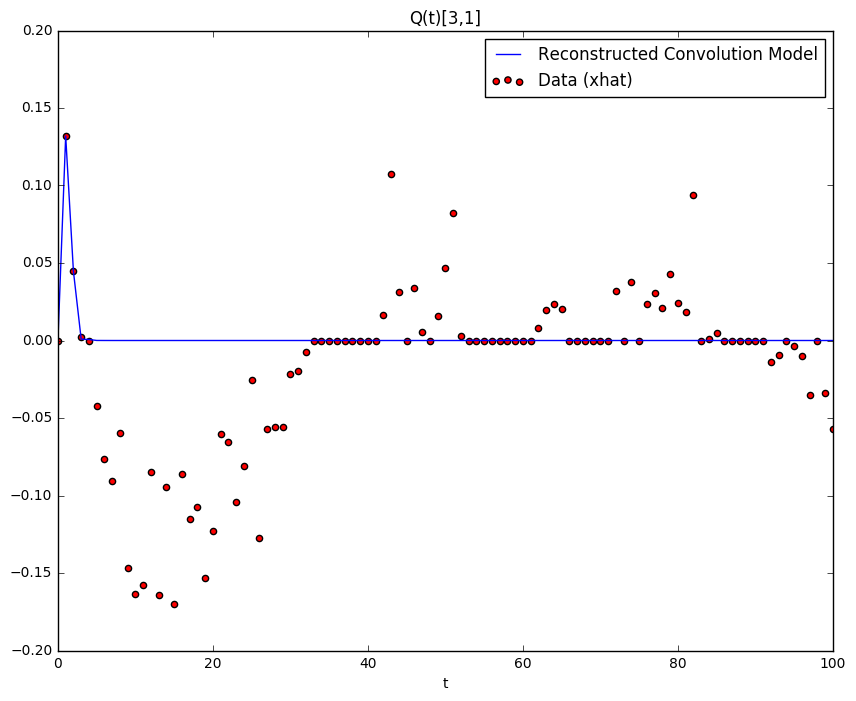

In [11]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, order=4, real_params=real_params, robust=True)
recon.unmeasured(y + np.random.randn(u.shape[0], u.shape[1]),plot=True)  #, ij=(1,3))